<a href="https://colab.research.google.com/github/ft10101/AI-ML/blob/main/cifar_classification_transferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0
print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

170498071/170498071 [==============================] - 14s 0us/step
Number of original training examples: 50000
Number of original test examples: 10000


In [ ]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

In [ ]:
x_train.shape

(50000, 32, 32, 3, 1)

In [ ]:
x_train =np.squeeze(x_train)
x_test = np.squeeze(x_test)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

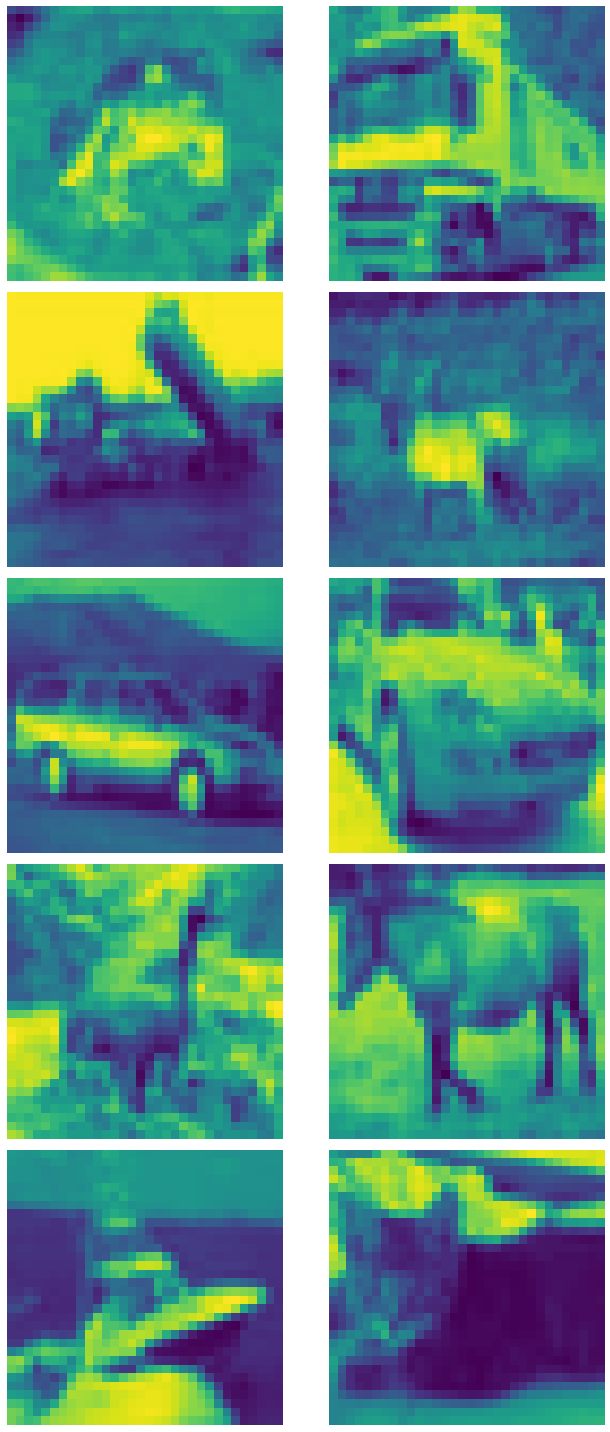

In [ ]:
import matplotlib.pyplot as plt

# pick 10 images from x_train
images = x_train[:10]

# create a subplot with 5 rows and 2 columns
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.ravel()

# loop through the 10 images and display each one
for i, img in enumerate(images):
    axes[i].imshow(img[:, :, 0])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
print(y_train[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


Building the Neural Network

In [ ]:
from tensorflow import keras

In [ ]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
model.fit(x_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
1407/1407 [==============================] - 6s 3ms/step - loss: 1.9771 - acc: 0.2749 - val_loss: 1.8736 - val_acc: 0.3120
Epoch 2/50
1407/1407 [==============================] - 4s 3ms/step - loss: 1.8604 - acc: 0.3194 - val_loss: 1.8543 - val_acc: 0.3206
Epoch 3/50
1407/1407 [==============================] - 4s 3ms/step - loss: 1.8299 - acc: 0.3330 - val_loss: 1.8221 - val_acc: 0.3374
Epoch 4/50
1407/1407 [==============================] - 4s 3ms/step - loss: 1.8160 - acc: 0.3390 - val_loss: 1.8653 - val_acc: 0.3156
Epoch 5/50
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7972 - acc: 0.3457 - val_loss: 1.8033 - val_acc: 0.3516
Epoch 6/50
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7788 - acc: 0.3528 - val_loss: 1.7833 - val_acc: 0.3578
Epoch 7/50
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7625 - acc: 0.3602 - val_loss: 1.7748 - val_acc: 0.3552
Epoch 8/50
1407/1407 [==============================] - 4s 3ms

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 1.6603 - acc: 0.4095
Test Accuracy = 0.40950000286102295


In [ ]:
x_test.shape

(10000, 32, 32, 3)

**ResNet50**

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 4s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:
num_of_classes = 10

model = models.Sequential()

model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))

model.add(convolutional_base)

model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs=2)

Epoch 1/2
1407/1407 [==============================] - 644s 444ms/step - loss: 1.5202 - acc: 0.4960 - val_loss: 0.6421 - val_acc: 0.8274
Epoch 2/2
1407/1407 [==============================] - 623s 442ms/step - loss: 0.8812 - acc: 0.7482 - val_loss: 0.4161 - val_acc: 0.8974


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 38s 122ms/step - loss: 0.4333 - acc: 0.8944
Test Accuracy = 0.8944000005722046


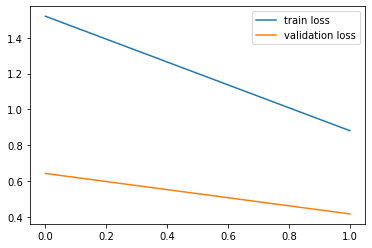

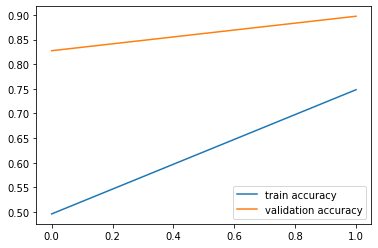

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()